In [45]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

##### Method Euler

In [46]:
x = 0.0
xStop = 2.0
y = np.array([0.0, 1.0])
h_e = 0.01

In [47]:
def Euler (F, x,y, xStop, h):
    
    X = []
    Y = []
    X.append(x)
    Y.append(y)

    i = 0

    while x < xStop:
        
        h = min (h, xStop - x) 
        y = y + h* F(x,y) 
        x = x + h
        X.append (x) 
        Y.append (y)
        i += 1

        print (f"iterasi ke [{i}]: \n nilai f(x{i}, y{i}) = {y} \n nilai x = {x}\n\n")

    return np.array (X), np.array (Y)

In [48]:
def printSoln (X,Y, step):

    def printHead (n):
        print("\n        x  ",end=" ")

        for i in range (n):
            print("      y[",i,"] ",end=" ")
        print()

    def printLine (x,y,n):
        print ("{:13.4e}".format(x),end=" ")

        for i in range (n):
            print("{:13.4e}".format(y[i]),end=" ")
        print()

    m = len(Y)

    try: 
        n = len(Y[0])
    except TypeError: 
        n = 1
    if step == 0: 
        step = m
    printHead (n)

    for i in range(0, m, step):
        printLine (X[i], Y[i], n)

    if i != m - 1: 
        printLine (X[m - 1], Y[m - 1], n)

##### Fungsi yang ingin dicari

In [49]:
def F(x,y):
    
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

In [50]:
X_e, Y_e = Euler (F, x,y, xStop, h_e)
yExact = 100.0*X_e - 5.0*X_e**2 + 990.0*(np.exp(-0.1*X_e) - 1.0)

iterasi ke [1]: 
 nilai f(x1, y1) = [0.01  0.999] 
 nilai x = 0.01


iterasi ke [2]: 
 nilai f(x2, y2) = [0.01999  0.997901] 
 nilai x = 0.02


iterasi ke [3]: 
 nilai f(x3, y3) = [0.02996901 0.9967031 ] 
 nilai x = 0.03


iterasi ke [4]: 
 nilai f(x4, y4) = [0.03993604 0.9954064 ] 
 nilai x = 0.04


iterasi ke [5]: 
 nilai f(x5, y5) = [0.0498901  0.99401099] 
 nilai x = 0.05


iterasi ke [6]: 
 nilai f(x6, y6) = [0.05983021 0.99251698] 
 nilai x = 0.060000000000000005


iterasi ke [7]: 
 nilai f(x7, y7) = [0.06975538 0.99092446] 
 nilai x = 0.07


iterasi ke [8]: 
 nilai f(x8, y8) = [0.07966463 0.98923354] 
 nilai x = 0.08


iterasi ke [9]: 
 nilai f(x9, y9) = [0.08955696 0.9874443 ] 
 nilai x = 0.09


iterasi ke [10]: 
 nilai f(x10, y10) = [0.09943141 0.98555686] 
 nilai x = 0.09999999999999999


iterasi ke [11]: 
 nilai f(x11, y11) = [0.10928698 0.9835713 ] 
 nilai x = 0.10999999999999999


iterasi ke [12]: 
 nilai f(x12, y12) = [0.11912269 0.98148773] 
 nilai x = 0.1199999999999999

##### Plot hasil

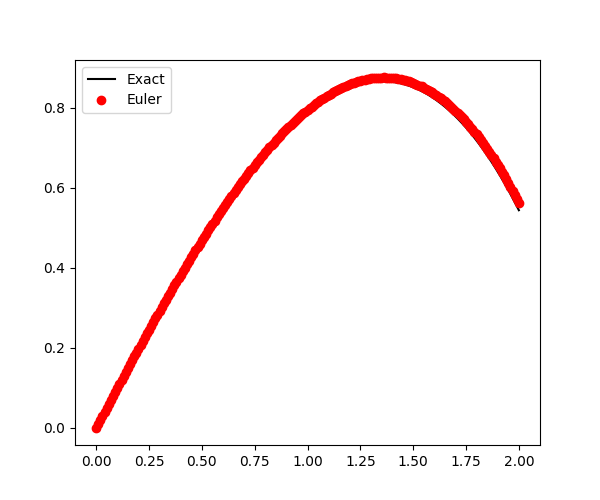

In [51]:
fig, ax = plt.subplots (figsize= (6, 5))
ax.plot (X_e, yExact, '-', color='black', label='Exact')
ax.plot (X_e, Y_e[:,0], 'o', color='red', label='Euler')
plt.legend (loc="best")
plt.show ()

##### Method Kutte

In [52]:
x = 0.0
xStop = 2.0
y = np.array([0.0, 1.0])
h_k = 0.05

In [53]:
def Kutte (F,x,y,xStop,h):

    def run_kut4 (F,x,y,h):

        K0 = h*F(x,y)
        K1 = h*F(x + h/2.0, y + K0/2.0)
        K2 = h*F(x + h/2.0, y + K1/2.0)
        K3 = h*F(x + h, y + K2)
        
        return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
    
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    
    i = 0

    while x < xStop:

        h = min(h,xStop - x)
        y = y + run_kut4 (F,x,y,h) 
        x = x + h
        X.append(x)
        Y.append(y)
        
        i += 1
        print (f"iterasi ke [{i}]: \n nilai f(x{i}, y{i}) = {y} \n nilai x = {x}\n\n")

    return np.array(X), np.array(Y)

In [54]:
X_k, Y_k = Kutte (F, x,y, xStop, h_k)
yExact = 100.0*X_e - 5.0*X_e**2 + 990.0*(np.exp(-0.1*X_e) - 1.0)

iterasi ke [1]: 
 nilai f(x1, y1) = [0.0498544  0.99376456] 
 nilai x = 0.05


iterasi ke [2]: 
 nilai f(x2, y2) = [0.09933541 0.98506646] 
 nilai x = 0.1


iterasi ke [3]: 
 nilai f(x3, y3) = [0.14832021 0.97391798] 
 nilai x = 0.15000000000000002


iterasi ke [4]: 
 nilai f(x4, y4) = [0.19668657 0.96033134] 
 nilai x = 0.2


iterasi ke [5]: 
 nilai f(x5, y5) = [0.24431291 0.94431871] 
 nilai x = 0.25


iterasi ke [6]: 
 nilai f(x6, y6) = [0.29107821 0.92589218] 
 nilai x = 0.3


iterasi ke [7]: 
 nilai f(x7, y7) = [0.3368621  0.90506379] 
 nilai x = 0.35


iterasi ke [8]: 
 nilai f(x8, y8) = [0.38154476 0.88184552] 
 nilai x = 0.39999999999999997


iterasi ke [9]: 
 nilai f(x9, y9) = [0.42500701 0.8562493 ] 
 nilai x = 0.44999999999999996


iterasi ke [10]: 
 nilai f(x10, y10) = [0.46713026 0.82828697] 
 nilai x = 0.49999999999999994


iterasi ke [11]: 
 nilai f(x11, y11) = [0.50779647 0.79797035] 
 nilai x = 0.5499999999999999


iterasi ke [12]: 
 nilai f(x12, y12) = [0.54688825 0.7

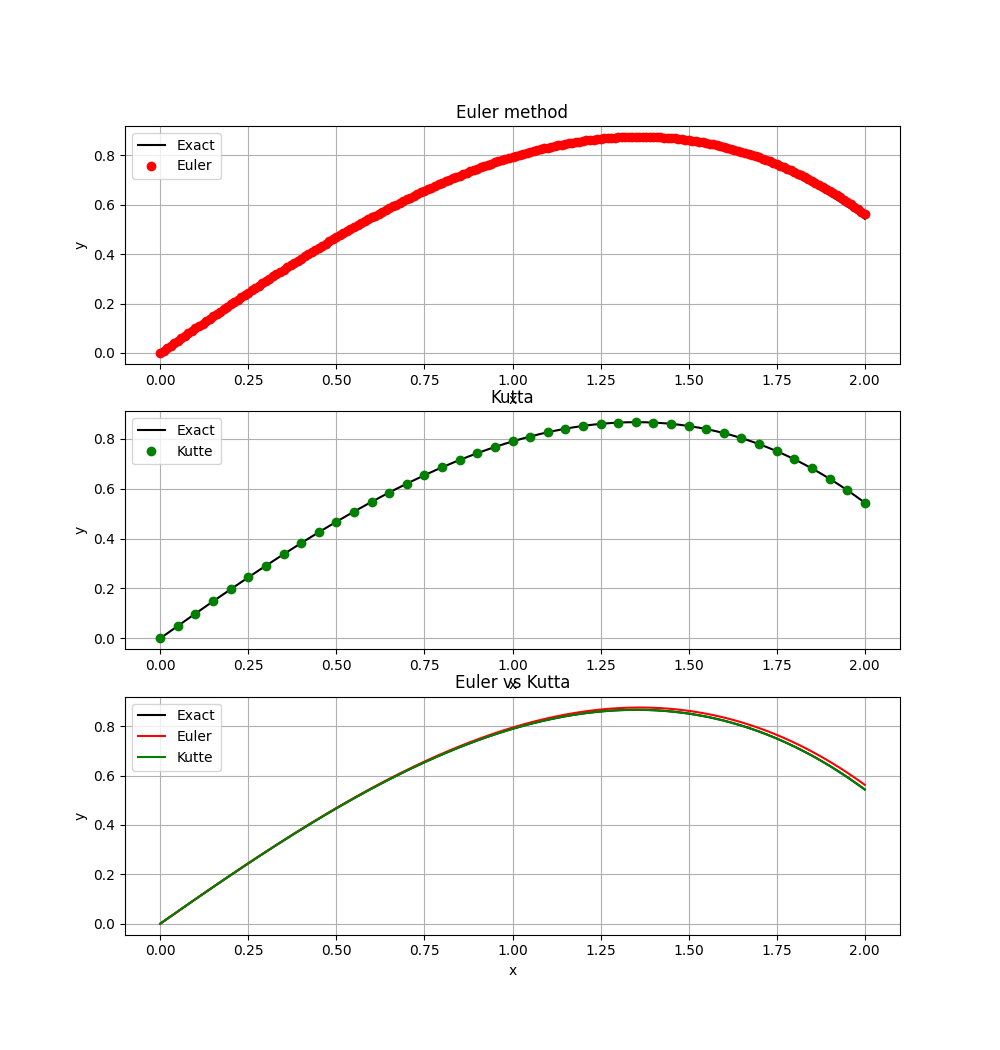

In [55]:
fig, ax = plt.subplots (3, figsize=(10, 10.5))

for i in range (3):
    
    ax[i].plot (X_e, yExact, '-k', label='Exact')
    ax[i].set_xlabel ('x')
    ax[i].set_ylabel('y')
    ax[i].grid (True)

ax[2].plot (X_e, Y_e[:,0], '-', color='red', label='Euler')
ax[2].plot (X_k, Y_k[:,0], '-', color='green', label='Kutte')
ax[0].plot (X_e, Y_e[:,0], 'o', color='red', label='Euler')
ax[1].plot (X_k, Y_k[:,0], 'o', color='green', label='Kutte')

ax[0].set_title ("Euler method")
ax[1].set_title ("Kutta")
ax[2].set_title ("Euler vs Kutta")

for i in range (3):
    ax[i].legend (loc='best')

plt.show ()